In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import polars as pl

In [2]:
# log.txt is a sequence of comma-separated floats.
# each line is a policy distribution over moves on bottom row of the 7-wide 6-high connect4 board.
# so we'll need to embed the 1d policy onto the 2d board to visualize it.

# load the log file
log = pl.read_csv('log.txt', has_header=False)
# drop the rightmost column, which is empty
log = log.drop(log.columns[-1])
# drop the last row, which is corrupted
log = log[:-1]

len(log)

26376

In [3]:
# convert to numpy array
log = log.to_numpy()

# create a vector of 2d boards
boards = np.zeros((len(log), 6, 7))

# embed the 1d policy onto the 2d board
for i in range(len(log)):
    boards[i, 5] = log[i]

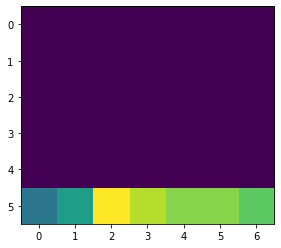

In [4]:
# display the first board as a sanity check
plt.imshow(boards[0])

MovieWriter imagemagick unavailable; using Pillow instead.


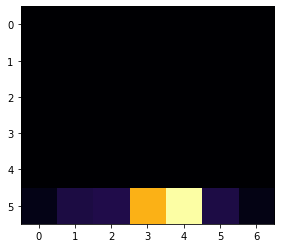

In [5]:
# animate the change of the policy distribution
fig, ax = plt.subplots()
im = ax.imshow(boards[0], cmap='inferno')

def animate(i):
    im.set_data(boards[i * 64])
    return im,

ani = animation.FuncAnimation(fig, animate, frames=len(log) // 64, interval=64)
ani.save('policy.gif', writer='imagemagick', fps=1000 // 64)